In [1]:
import pandas as pd

In [44]:
old_prices = pd.read_csv("../databases/prices_raw.csv", index_col=0, compression='xz')
new_prices = pd.read_csv("../databases/prices_raw2.csv", index_col=0, compression='xz')
df_variants = pd.read_csv("../databases/variants_raw.csv", index_col=0, compression='xz')
print(f'old_prices.shape: {old_prices.shape}')
print(f'new_prices.shape: {new_prices.shape}')

old_prices.shape: (34813, 11)
new_prices.shape: (33895, 11)


/tmp/ipykernel_21069/1982600571.py:3: DtypeWarning: Columns (5,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df_variants = pd.read_csv("../variants_raw.csv", index_col=0, compression='xz')


In [68]:
old_prices.tail()

,net,gross,currency,decimalPlaces,netDiscounted,grossDiscounted,discountPercentage,discountValidFrom,discountValidTo,isDiscounted,id
34808,8990,8990,HUF,0,8990,8990,0,NaN,NaN,False,4120288
34809,11990,11990,HUF,0,11990,11990,0,NaN,NaN,False,4120291
34810,2990,2990,HUF,0,2990,2990,0,NaN,NaN,False,4120375
34811,2990,2990,HUF,0,2990,2990,0,NaN,NaN,False,4120372
34812,5990,5990,HUF,0,5990,5990,0,NaN,NaN,False,4120369


In [17]:
old_prices["gross"].sort_values(ascending=False).head(10)

21530    2399999
21585    2299999
21642    1149999
21499     999999
21541     959990
21584     849999
21641     849999
21531     799999
21643     749999
22497     741999
Name: gross, dtype: int64

In [18]:
new_prices["gross"].sort_values(ascending=False).head(10)

37552    2999999
37548    2399999
37544    1149999
36226     999999
36891     938699
36221     936999
37540     879999
36771     879999
42441     839990
42437     839990
Name: gross, dtype: int64

<AxesSubplot: >

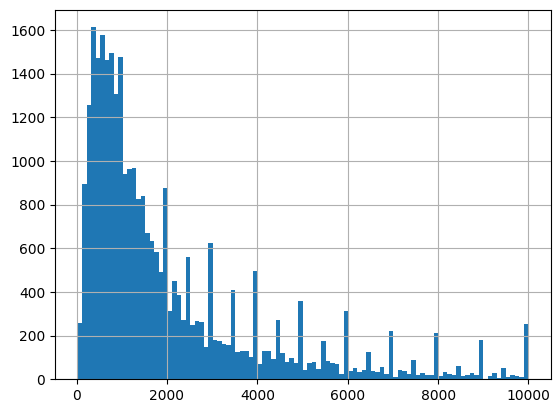

In [11]:
old_prices.loc[old_prices["gross"] < 10001, "gross"].hist(bins=100)

<AxesSubplot: >

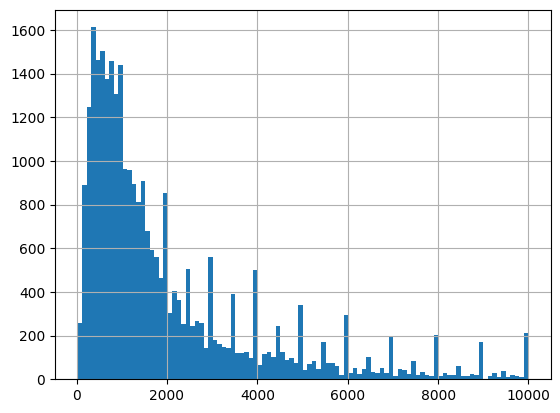

In [19]:
new_prices.loc[new_prices["gross"] < 10001, "gross"].hist(bins=100)

In [29]:
pd.options.display.float_format = '{:.2f}'.format

In [34]:
old_prices["gross"].describe(percentiles=[.1, .15, .2, .25, .35, .5, .75, .9])

count     34813.00
mean       9380.65
std       40580.47
min          20.00
10%         399.00
15%         499.00
20%         599.00
25%         719.00
35%         999.00
50%        1539.00
75%        3999.00
90%       13249.00
max     2399999.00
Name: gross, dtype: float64

In [35]:
new_prices["gross"].describe(percentiles=[.1, .15, .2, .25, .35, .5, .75, .9])

count     33895.00
mean      10143.96
std       46191.03
min          20.00
10%         389.00
15%         499.00
20%         599.00
25%         719.00
35%         999.00
50%        1499.00
75%        3999.00
90%       13990.00
max     2999999.00
Name: gross, dtype: float64

In [45]:
# merge the two dataframes on id where gross is not the same
merged = pd.merge(old_prices, new_prices, on="id", suffixes=("_old", "_new"), how="outer", indicator=True)
merged = merged.loc[merged["_merge"] == "both"]
merged = merged.loc[merged["gross_old"] != merged["gross_new"]]
# merge variants on id
merged = pd.merge(merged, df_variants, on="id", how="left")

In [46]:
merged[["name", "gross_old", "gross_new"]]

,name,gross_old,gross_new
0,Almás rétes 500 g,1359.00,899.00
1,Barackos - túrós rétes 500 g,1359.00,899.00
2,Káposztás rétes 500 g,1359.00,899.00
3,Meggyes - mákos rétes 500 g,1359.00,899.00
4,Meggyes rétes 500 g,1359.00,899.00
...,...,...,...
3720,Tefal G2841973 Selection wok 28cm,6993.00,11990.00
3721,Tefal L2379102 Ingenio edénykészlet 4db,13993.00,19990.00
3722,Tefal L897s374 Ingenio edénykészlet 5db,15393.00,21990.00
3723,Tefal l897s574 Ingenio edénykészlet 5db,20993.00,29990.00


In [47]:
merged.loc[merged["gross_old"] < merged["gross_new"], ["name", "gross_old", "gross_new"]]

,name,gross_old,gross_new
6,Auchan Nívó Gyorsfagyasztott tisztított koktél...,2200.00,2989.00
7,VICI fűszeres lazac porciók 200 g,1899.00,2659.00
8,VICI fokhagymás lazac porciók,1899.00,2659.00
9,Vici gyorsfagyasztott lazac porciók citromos p...,1899.00,2659.00
11,"Iglo panírréteggel fedett elősütött, gyorsfagy...",1699.00,2399.00
...,...,...,...
3720,Tefal G2841973 Selection wok 28cm,6993.00,11990.00
3721,Tefal L2379102 Ingenio edénykészlet 4db,13993.00,19990.00
3722,Tefal L897s374 Ingenio edénykészlet 5db,15393.00,21990.00
3723,Tefal l897s574 Ingenio edénykészlet 5db,20993.00,29990.00


In [94]:
# percent change by each row
merged["percent_change"] = ((merged["gross_new"] - merged["gross_old"]) / merged["gross_old"])*100
merged["discounted_percent_change"] = ((merged["grossDiscounted_new"] - merged["grossDiscounted_old"]) / merged["grossDiscounted_old"])*100
merged.loc[(~merged["isDiscounted_old"]) & (~merged["isDiscounted_new"]), ['name', 'gross_old', "grossDiscounted_old", 'gross_new', "grossDiscounted_new", 'percent_change', 'discounted_percent_change']].sort_values(by="percent_change", ascending=False)

,name,gross_old,grossDiscounted_old,gross_new,grossDiscounted_new,percent_change,discounted_percent_change
2936,Ghost of Tsushima PS4 játékszoftver,3990.00,3990.00,17000.00,17000.00,326.07,326.07
2938,The Last Of Us II PS4 játékszoftver,3990.00,3990.00,16490.00,16490.00,313.28,313.28
1691,Listerine Total Care Teeth Protection szájvíz ...,499.00,499.00,1609.00,1609.00,222.44,222.44
55,Francesco Petretti: Észak-Amerika - csodálatos...,2990.00,2990.00,8990.00,8990.00,200.67,200.67
56,Giovanni Giuseppe Bellani: Afrika - csodálatos...,2990.00,2990.00,8990.00,8990.00,200.67,200.67
...,...,...,...,...,...,...,...
3611,Dekantáló üveg 1500 ml,3990.00,3990.00,1200.00,1200.00,-69.92,-69.92
3146,Star Wars L0-LA59 (Lola) Animatronikus figura,34990.00,34990.00,10000.00,10000.00,-71.42,-71.42
3602,Gyertya rusztikus henger 5x10 cm fehér,500.00,500.00,100.00,100.00,-80.00,-80.00
3558,Gyertya Rusztikus Henger 5*10cm Piros,500.00,500.00,100.00,100.00,-80.00,-80.00


In [92]:
merged[['name', 'gross_old', 'gross_new', 'percent_change', 'isDiscounted_old', 'isDiscounted_new', 'grossDiscounted_old', 'grossDiscounted_new']].sort_values(by="percent_change", ascending=False)

,name,gross_old,gross_new,percent_change,isDiscounted_old,isDiscounted_new,grossDiscounted_old,grossDiscounted_new
2936,Ghost of Tsushima PS4 játékszoftver,3990.00,17000.00,326.07,False,False,3990.00,17000.00
2938,The Last Of Us II PS4 játékszoftver,3990.00,16490.00,313.28,False,False,3990.00,16490.00
1691,Listerine Total Care Teeth Protection szájvíz ...,499.00,1609.00,222.44,False,False,499.00,1609.00
55,Francesco Petretti: Észak-Amerika - csodálatos...,2990.00,8990.00,200.67,False,False,2990.00,8990.00
56,Giovanni Giuseppe Bellani: Afrika - csodálatos...,2990.00,8990.00,200.67,False,False,2990.00,8990.00
...,...,...,...,...,...,...,...,...
3611,Dekantáló üveg 1500 ml,3990.00,1200.00,-69.92,False,False,3990.00,1200.00
3146,Star Wars L0-LA59 (Lola) Animatronikus figura,34990.00,10000.00,-71.42,False,False,34990.00,10000.00
3602,Gyertya rusztikus henger 5x10 cm fehér,500.00,100.00,-80.00,False,False,500.00,100.00
3558,Gyertya Rusztikus Henger 5*10cm Piros,500.00,100.00,-80.00,False,False,500.00,100.00


In [82]:
merged["isDiscounted_old"].value_counts()

False    3267
True      458
Name: isDiscounted_old, dtype: int64

In [96]:
merged.loc[merged["name"].str.contains("Durex"), ["name", "gross_old", "grossDiscounted_old", "gross_new", "grossDiscounted_new", "percent_change", "discounted_percent_change"]].sort_values(by="percent_change", ascending=False)

,name,gross_old,grossDiscounted_old,gross_new,grossDiscounted_new,percent_change,discounted_percent_change
1634,Durex Real Feel óvszer 16 db,3374.00,2699.00,6599.00,6599.00,95.58,144.50
1612,Durex feel intimate óvszer 18 db,2660.00,2128.00,4999.00,4999.00,87.93,134.92
1610,Durex Naturals H2O síkosító 100 ml,2235.00,1788.00,3699.00,3699.00,65.50,106.88
1613,Durex extra safe óvszer 18 db,2802.00,2242.00,4499.00,4499.00,60.56,100.67
1582,Durex Feel Ultra Thin óvszer 10 db,2767.00,1799.00,3799.00,3799.00,37.30,111.17
1629,Durex Feel Intimate óvszer 12 db,2767.00,1799.00,3799.00,3799.00,37.30,111.17
1630,Durex Feel Thin óvszer 12 db,2767.00,1799.00,3799.00,3799.00,37.30,111.17
1584,Durex Invisible óvszer 10 db,3527.00,2293.00,4599.00,4599.00,30.39,100.57
1615,Durex Intense óvszer 10 db,3527.00,2293.00,4599.00,4599.00,30.39,100.57
1633,Durex Mutual Pleasure óvszer 10 db,3527.00,2293.00,4599.00,4599.00,30.39,100.57
